# Compiling Chemical Reaction Networks
__Overview:__ The main utility of BioCRNpyler is to compile complex CRNs from simple specifications. BioCRNpyler compilation is summarized in the below figure:

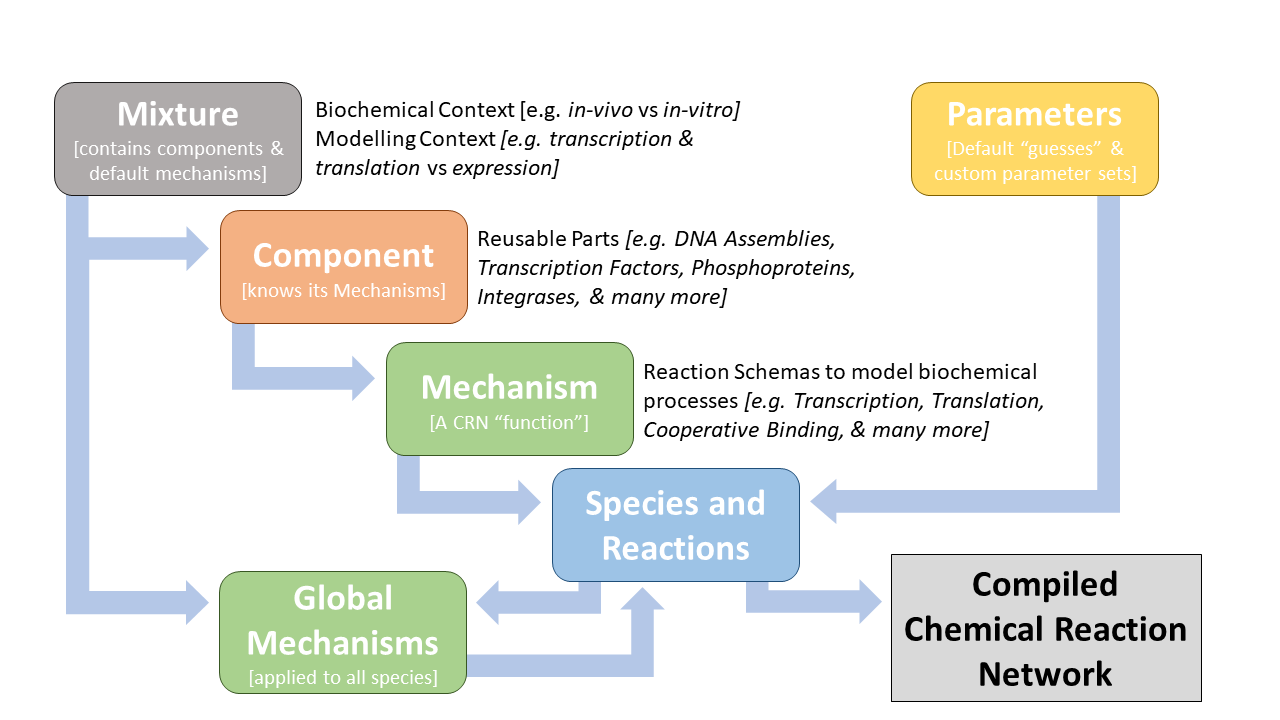

Mixtures represent context and contain Components and default Mechanisms. Components (biochemical parts) call Mechanisms which they inherit from Mixture or override internally. Mechanisms are reaction schemas (abstract functions that produce CRN Species and Reactions) that represent different biochemical processes. Mechanisms find reaction parameters they need from a parameter file. More details on parameter loading can be seen in the parameter ipython notebook. 

In this notebook, a number of basic BioCRNpyler models are compiled involving enzymes and molecular binding. This notebook highlights the structure of BioCRNpyler and how to control compilation. Other notebooks highlight the available Mixtures, Components, and Mechanisms through detailed examples.

# Example 1: Enzymes & Default Mechanisms

In this example, we examine two different mechanisms for modeling an Enzyme $E$ which converts a substrate $S$ into a product $P$ in an in-vitro context (no dilution of any species):

In this context, Enzyme is a Component which looks for a 'catalysis' Mechanism. Two different Mixtures will be compared with different default 'catalysis' Mechanisms.

1. Baisc Catalysis: $E + S \xrightarrow{k_{cat}} E + P$
2. Michaelis Menten Catalysis: $E + S \underset{k_u}{\overset{k_b}{\rightleftharpoons}}E:S \xrightarrow{k_{cat}} E + P$

By default, the Enzyme Component will inherit the Mechanism in its Mixture.

In [1]:
%matplotlib inline
from biocrnpyler import *

#We will use default parameter names
default_parameters = {"kb":100, "ku":10, "kcat":1.}

#Mixture 1 (M1) will contain an Enzyme E1
E = Enzyme("E", substrate = "S", product = "P")

#Choose a catalysis mechanism by commenting out one of them.
mech_cat = BasicCatalysis()
#mech_cat = MichaelisMenten()

#place that mechanism in a dictionary: "catalysis":mech_cat
default_mechanisms = {mech_cat.mechanism_type:mech_cat}

#Create a mixture.
#Components is a list of Components in the mixture
#parameters is a dictionary of parameters. Can also accept parameter_file.
#default_mechanisms = dict sets the default_mechanisms in the Mixture
M = Mixture("Catalysis Mixture", components = [E], parameters = default_parameters, mechanisms = default_mechanisms)
print("repr(Mixture) gives a printout of what is in a mixture and what it's Mechanisms are:\n", repr(M),"\n")

#Compile the CRN with Mixture.compile_crn
CRN = M.compile_crn()

#CRNs can be printed in two ways
print("String representation of a CRN shows the string names of all species:\n",CRN, "\n\n")
print("Pretty_print representation of a CRN has formatting options and is easier to read:\n",
      CRN.pretty_print(show_rates = True, show_attributes = True, show_materials = True, show_keys = False))

repr(Mixture) gives a printout of what is in a mixture and what it's Mechanisms are:
 Mixture: Catalysis Mixture
Components = [
	Enzyme: E ]
Mechanisms = {
	catalysis:basic_catalysis } 

String representation of a CRN shows the string names of all species:
 Species = protein_E, S, P
Reactions = [
	protein[E]+S --> protein[E]+P
] 


Pretty_print representation of a CRN has formatting options and is easier to read:
 Species (3) = {0. protein[E], 1. S, 2. P}

Reactions (1) = [
0. protein[E]+S --> protein[E]+P
 Kf=k_forward * protein_E * S
  k_forward=1.0

]


# Example 2: Combining Multiple Enzymes into a Pathway Using Default Parameters for All Enzymes
Next, we will combine 3 enzymes together into a pathway:
1. $E_1$ converts $A$ to $B$
2. $E_2$ converts $C$ to $D$
3. $E_3$ is a MultiEnzyme which converts $B$ and $D$ to $F$

MultiEnzyme is a more general Enzyme Component which can have multiple substrates and products. Notice how all the Enzymes use the same default catalysis Mechanism which can be changed by changing the what is passed into default_mechanisms in the Mixture.

Finally, we show how specific parameters can be used for each enzyme or default parameters shared between all Components.
Default parameters can be given in a dictionary using the name of the parameter as a keyword:

    "parameter name" : value
    

In [2]:
#These simple parameters can be used by default for all enzymes
default_parameters = {"kb":100, "ku":10, "kcat":1.}

E1 = Enzyme("E1", substrate = "A", product = "B")
E2 = Enzyme("E2", substrate = "C", product = "D")
E3 = MultiEnzyme("E3", substrates = ["B", "D"], products = ["F"])

#creeate a catalysis mechanism. 
mech_cat = BasicCatalysis()
#mech_cat = MichaelisMenten()

#place that mechanism in a dictionary: "catalysis":mech_cat
default_mechanisms = {mech_cat.mechanism_type:mech_cat}

#Create a mixture.
#Components is a list of Components in the mixture
#parameters is a dictionary of parameters. Can also accept parameter_file.
#default_mechanisms = dict sets the default_mechanisms in the Mixture
M = Mixture("Default Param Pathway", components = [E1, E2, E3], parameters = default_parameters, mechanisms = default_mechanisms)
print("repr(Mixture) gives a printout of what is in a mixture and what it's Mechanisms are:\n", repr(M),"\n")

#Compile the CRN with Mixture.compile_crn
CRN = M.compile_crn()
print(CRN.pretty_print(show_rates = True, show_attributes = True, show_materials = True, show_keys = False))

repr(Mixture) gives a printout of what is in a mixture and what it's Mechanisms are:
 Mixture: Default Param Pathway
Components = [
	Enzyme: E1
	Enzyme: E2
	MultiEnzyme: E3 ]
Mechanisms = {
	catalysis:basic_catalysis } 

Species (8) = {0. protein[E1], 1. A, 2. B, 3. protein[E2], 4. C, 5. D, 6. protein[E3], 7. F}

Reactions (3) = [
0. protein[E1]+A --> protein[E1]+B
 Kf=k_forward * protein_E1 * A
  k_forward=1.0

1. protein[E2]+C --> protein[E2]+D
 Kf=k_forward * protein_E2 * C
  k_forward=1.0

2. protein[E3]+B+D --> protein[E3]+F
 Kf=k_forward * protein_E3 * B * D
  k_forward=1.0

]


# Example 3: A Pathway of Enzymes with Specific Parameters for Each Enzyme
In the previous example, the same default parameters used by all the Enzymes. It is also easy to have specific parameters for each enzyme. Specific parameters can be given in a dictionary or parameter file using a variety of keys (see the Parameters notebook for details). The simplest, however, is to make a dictionary of ParameterKeys:

    ParameterKey(mechanism = "mechanism name/type", part_id = "component name", name = "parameter name") : value

Notice that by switching the catalysis Mechanism, different parameters are used.

In [3]:
#Or specific parameters can be made which give different rates for each enzyme
#The first row of parameters is used by BasicCatalysis
#The second-fourth row of parameters is used my MichaelisMenten catalysis
specific_parameters = {
    ParameterKey(mechanism = "basic_catalysis", part_id = "E1", name = "kcat"):100,
    ParameterKey(mechanism = "basic_catalysis", part_id = "E2", name = "kcat"):200, 
    ParameterKey(mechanism = "basic_catalysis", part_id = "E3", name = "kcat"):300,
    ParameterKey(mechanism = "michalis_menten", part_id = "E1", name = "kb"):111,
    ParameterKey(mechanism = "michalis_menten", part_id = "E1", name = "ku"):11, 
    ParameterKey(mechanism = "michalis_menten", part_id = "E1", name = "kcat"): 1.11,
    ParameterKey(mechanism = "michalis_menten", part_id = "E2", name = "kb"):222, 
    ParameterKey(mechanism = "michalis_menten", part_id = "E2", name = "ku"):22, 
    ParameterKey(mechanism = "michalis_menten", part_id = "E2", name = "kcat"): 2.22,
    ParameterKey(mechanism = "michalis_menten", part_id = "E3", name = "kb"):333, 
    ParameterKey(mechanism = "michalis_menten", part_id = "E3", name = "ku"):33, 
    ParameterKey(mechanism = "michalis_menten", part_id = "E3", name = "kcat"): 3.33
}

E1 = Enzyme("E1", substrate = "A", product = "B")
E2 = Enzyme("E2", substrate = "C", product = "D")
E3 = MultiEnzyme("E3", substrates = ["B", "D"], products = ["F"])

#choose a catalysis mechanism. 
#mech_cat = BasicCatalysis()
mech_cat = MichaelisMenten()

#place that mechanism in a dictionary: "catalysis":mech_cat
default_mechanisms = {mech_cat.mechanism_type:mech_cat}

#To change the parameters, pass in a different dictionary using the parameter keyword
M = Mixture("Catalysis Mixture", components = [E1, E2, E3], parameters = specific_parameters, mechanisms = default_mechanisms)
CRN = M.compile_crn()
print("Using Specific Parameters for all reactions:")
print("Viewing the ParameterKeys used in a CRN can be toggled with the show_keys=True/False keyword in CRN.pretty_print.\n")
print(CRN.pretty_print(show_rates = True, show_keys = True))

Using Specific Parameters for all reactions:
Viewing the ParameterKeys used in a CRN can be toggled with the show_keys=True/False keyword in CRN.pretty_print.

Species (11) = {0. protein[E1], 1. A, 2. B, 3. complex[A:protein[E1]], 4. protein[E2], 5. C, 6. D, 7. complex[C:protein[E2]], 8. protein[E3], 9. F, 10. complex[B:D:protein[E3]]}

Reactions (6) = [
0. A+protein[E1] <--> complex[A:protein[E1]]
 Kf=k_forward * A * protein_E1
 Kr=k_reverse * complex_A_protein_E1
  k_forward=111
  found_key=(mech=michalis_menten, partid=E1, name=kb).
  search_key=(mech=michalis_menten, partid=E1, name=kb).
  k_reverse=11
  found_key=(mech=michalis_menten, partid=E1, name=ku).
  search_key=(mech=michalis_menten, partid=E1, name=ku).

1. complex[A:protein[E1]] --> B+protein[E1]
 Kf=k_forward * complex_A_protein_E1
  k_forward=1.11
  found_key=(mech=michalis_menten, partid=E1, name=kcat).
  search_key=(mech=michalis_menten, partid=E1, name=kcat).

2. C+protein[E2] <--> complex[C:protein[E2]]
 Kf=k_forwa

# Example 4: Adding a Custom Mechanism to a Component
Notice that in the above CRN, the enzymatic process is irreversible. However, many biochemists would argue that irreversibility is actually an approximation. In reality, the products of the reaction can bind to the enzyme and, if the chemical potential is high enough, cause the reverse reaction to occur. In many cases, it might be desirable to to only include the reverse reaction for some of the enzymatic reactions being in the Model. In BioCRNpyler, this can be done easily by adding a custom Mechanism to an individual Component which will override the default Mechanism provided by the Mixture.

This is illustrated on the pathway built above, where here Enzyme 3 will be given a new catalysis mechanism called MichaelisMentenReversible: $E + S \rightleftarrows E:S \rightleftarrows E:P \rightleftarrows E + P$

In [4]:
#The MichaelisMentenReversible has different parameter names: kb1, ku1, kb2, ku2, and kcat_rev
default_parameters = {"kb":100, "ku":10, "kcat":1., "kb1":111, "kb2":22, "ku1":11, "ku2":22, "kcat_rev":.001}

#Enzymes 1 and 2 are the same as above
E1 = Enzyme("E1", substrate = "A", product = "B")
E2 = Enzyme("E2", substrate = "C", product = "D")

#Create a dictionary of custom mechanisms to pass into E3 with the mechanisms keyword
mm_reversible = MichaelisMentenReversible()
custom_mechanisms = {mm_reversible.mechanism_type:mm_reversible}
E3 = MultiEnzyme("E3", substrates = ["B", "D"], products = ["F"], mechanisms = custom_mechanisms)

#choose a catalysis mechanism. 
#mech_cat = BasicCatalysis()
mech_cat = MichaelisMenten()
#place that mechanism in a dictionary: "catalysis":mech_cat
default_mechanisms = {mech_cat.mechanism_type:mech_cat}
#Make the Mixture
M = Mixture("Catalysis Mixture", components = [E1, E2, E3], parameters = default_parameters, mechanisms = default_mechanisms)
#Compile the CRN
CRN = M.compile_crn()

print("Notice that there are additional reactions involving E3:\n", CRN.pretty_print(show_rates = True, show_keys = False))

Notice that there are additional reactions involving E3:
 Species (12) = {0. protein[E1], 1. A, 2. B, 3. complex[A:protein[E1]], 4. protein[E2], 5. C, 6. D, 7. complex[C:protein[E2]], 8. protein[E3], 9. F, 10. complex[B:D:protein[E3]], 11. complex[F:protein[E3]]}

Reactions (7) = [
0. A+protein[E1] <--> complex[A:protein[E1]]
 Kf=k_forward * A * protein_E1
 Kr=k_reverse * complex_A_protein_E1
  k_forward=100
  k_reverse=10

1. complex[A:protein[E1]] --> B+protein[E1]
 Kf=k_forward * complex_A_protein_E1
  k_forward=1.0

2. C+protein[E2] <--> complex[C:protein[E2]]
 Kf=k_forward * C * protein_E2
 Kr=k_reverse * complex_C_protein_E2
  k_forward=100
  k_reverse=10

3. complex[C:protein[E2]] --> D+protein[E2]
 Kf=k_forward * complex_C_protein_E2
  k_forward=1.0

4. B+D+protein[E3] <--> complex[B:D:protein[E3]]
 Kf=k_forward * B * D * protein_E3
 Kr=k_reverse * complex_B_D_protein_E3
  k_forward=111
  k_reverse=11

5. F+protein[E3] <--> complex[F:protein[E3]]
 Kf=k_forward * F * protein_E3


# Example 5: Modelling an Enzyme which is also a ChemicalComplex (Binding)

In this example, we will consider the followingbiochemical process: the tetramerization of the biosynthesis protein Inosine-5′monophosphate dehydrogenase (IMPDH) which is a homeotetramer that catalyzes the following reaction important in guanine biosynthesis:

$\textrm{inosine-5'-phosphate} + \textrm{NAD}^+ + H_2O \rightleftharpoons  \textrm{xanthosine-5'-phosphate} + \textrm{NADH} + H^+$

The ChemicalComplex Component will represent the assembled protein Complex IMPDH formed by 4 identifical monomer subunits. ChemicalComplex is effectively a wrapper around a ComplexSpecies in order to provide binding reactions. The catalysis of the above reaction will be accomplished by simultaneously making IMPDH an Enzyme.

In [5]:
#Use default parameters for simplicity
default_parameters = {"kb":100, "ku":10, "kcat":1., "kb1":111, "kb2":22, "ku1":11, "ku2":22, "kcat_rev":.001}

#Create a single species to represent the monomer.
monomer = Species("IMPDH", material_type = "subunit")

#A ChemicalComplex takes a list of species and allows them all to bind together.
C = ChemicalComplex(species = [monomer]*4, name = "IMPDH")

#Here, we set the internal species of MultiEnzyme (enzyme) to the the ComplexSpecies stored inside ChemicalComplex. 
#This allows the same formal CRN species to be represented by multiple components and therefore participate in more reactions.
E = MultiEnzyme(enzyme = C.get_species(), substrates = ["isosine5phosphate", "NAD", "H2O"], products = ["xanthosine5phosphate", "NADH", "H"])


#choose a catalysis mechanism. 
#mech_cat = BasicCatalysis()
mech_cat = MichaelisMenten()
#mech_cat = MichaelisMentenReversible()

#create a binding mechanism
mech_bind = One_Step_Binding() #All species bind together in a single step

#place that mechanism in a dictionary: {"catalysis":mech_cat, "binding":mech_bind}
default_mechanisms = {mech_cat.mechanism_type:mech_cat, mech_bind.mechanism_type:mech_bind}

#Make the Mixture
M = Mixture("Catalysis Mixture", components = [E1, E2, E3], parameters = default_parameters, mechanisms = default_mechanisms)
#Compile the CRN
CRN = M.compile_crn()
print(CRN.pretty_print(show_rates = True, show_keys = False))

Species (12) = {0. protein[E1], 1. A, 2. B, 3. complex[A:protein[E1]], 4. protein[E2], 5. C, 6. D, 7. complex[C:protein[E2]], 8. protein[E3], 9. F, 10. complex[B:D:protein[E3]], 11. complex[F:protein[E3]]}

Reactions (7) = [
0. A+protein[E1] <--> complex[A:protein[E1]]
 Kf=k_forward * A * protein_E1
 Kr=k_reverse * complex_A_protein_E1
  k_forward=100
  k_reverse=10

1. complex[A:protein[E1]] --> B+protein[E1]
 Kf=k_forward * complex_A_protein_E1
  k_forward=1.0

2. C+protein[E2] <--> complex[C:protein[E2]]
 Kf=k_forward * C * protein_E2
 Kr=k_reverse * complex_C_protein_E2
  k_forward=100
  k_reverse=10

3. complex[C:protein[E2]] --> D+protein[E2]
 Kf=k_forward * complex_C_protein_E2
  k_forward=1.0

4. B+D+protein[E3] <--> complex[B:D:protein[E3]]
 Kf=k_forward * B * D * protein_E3
 Kr=k_reverse * complex_B_D_protein_E3
  k_forward=111
  k_reverse=11

5. F+protein[E3] <--> complex[F:protein[E3]]
 Kf=k_forward * F * protein_E3
 Kr=k_reverse * complex_F_protein_E3
  k_forward=22
  k_re